目标任务：将支持向量机应用于计算机视觉中的一个常见问题：行人检测
也就是检测是否有人存在在图像中间
1.使用面向梯度的直方图（Histogram of Oriented Gradient，HOG）进行特征提取
2.将svm应用到此任务中来

学习任务：
    用基于Python的OpenCV实现SVM.
    处理非线性决策边界
    理解核技巧.

知识点1：最优决策边界
    一个SVM在整个训练过程中更新其决策边界的选择。例如，在训练初期，分类器只看到很少的数据点，它试着画出分隔两个类的最佳决策边界。随着训练的进行，分类器会看到越来越多的数据样本，因此在每一步中不断更新决策边界
知识点2：为什么叫SVM支持向量机
    为了找到最大边界，只需要考虑位于类边界上的数据点。这些数据点也被称为支持向量（support vector）。这就是SVM这个名字的由来.
知识点3：SVM的思想(支持向量鲁棒性强)
      线性可分支持向量机（SVM）也是一种线性二分类模型，也需要找到满足 定理1 约束的划分超平面，即（w,  b），由于能将样本分开的超平面可能有很多，SVM进一步希望找到离个样本都比较远的划分超平面。

　　  当面对样本的随机扰动时，离每个样本都比较远的划分超平面对扰动的容忍能力比较强，即    不容易因为样本的随机扰动使得样本穿越到划分超平面的另外一侧而产生分类错误。因此这    样的划分超平面对样本比较稳健，不容易过拟合。另一方面，离各样本都比较远的划分超平    面不仅可以把正负样本都分开，还可以比较大的确信度将所有样本分开，包括难分的样本，    即离划分超平面近的样本.
知识点4：SVM与logic regression的区分
    SVM和Logistic虽然说都是寻找一个线性分类界限，但出发点不同。SVM是以训练集两个类的边界（支持向量）来考虑划分，而Logistic是从训练集的全局来考虑划分。这也就是为什么Logistic受噪声和离群点的影响比较大。当出现一个离群点时，Logistic划定的边界很有可能会改变。而SVM这边划分的边界却可能丝毫不动（因为离群点并不影响我支持向量).

实现第一个SVM支持向量机,2分类
1.生成数据集 sklean
        datasets.make_classification([n_samples,…])：这个函数生成一个随机的n类分类问题
        datasets.make_regression([n_samples,…])：这个函数生成一个随机回归问题.
        datasets.make_blobs([n_samples, n_features,…])：这个函数生成我们可用于聚类的一些高斯分布.


SVM,SVC,SVR的区别
SVM=Support Vector Machine 是支持向量
SVC=Support Vector Classification就是支持向量机用于分类,
SVC=Support Vector Regression.就是支持向量机用于回归分析

In [121]:
'''生成二分类的数据集，随机生成'''
import sklearn
from sklearn import  datasets
import numpy as np
import matplotlib.pyplot as plt
feature,target = datasets.make_classification(n_samples = 100,n_redundant = 0,n_features = 2,n_classes = 2)
feature,target
pass

生成的数据特征,
特征维度：2维度,
分类目标：二分类

核函数
    1.线性核函数（Linear Kernel)：普通的内积
    2.高斯核函数（Gaussian Kernel)
        也称为 径向基核函数（Radial Basisi Function，RBF）sklearn默认的核函数，表达式为：
        其中 r为自定义的超参数
        L2(x,y) = np.sqrt(pow(Gx,2)+pow(Gy,2))
        K(x,y) = exp( -r * L2(x,y))

    kernel常见有4种：
        linear 线性核函数
        poly 多项式核函数
        rbf 高斯核函数
        sigmoid 核函数



class sklearn.svm.LinearSVC(self, penalty='l2', loss='squared_hinge', dual=True, tol=1e-4,
             C=1.0, multi_class='ovr', fit_intercept=True,
             intercept_scaling=1, class_weight=None, verbose=0,
             random_state=None, max_iter=1000)
            penalty ：默认为L2 正则化
            loss ：L1损失和L2损失两种,默认L1损失
            dual：是否转化为对偶问题(联系高等数学下册 的  拉格朗日函数,拉格朗日乘子,解决带条件的问题求解的转换)
            tol：不清楚

            multi_class：负责多分类问题中分类策略制定，有‘ovr’和‘crammer_singer’ 两种参数值可选，默认值是’ovr’，'ovr'的分类原则是将待分类中的某一类当作正类，其他全部归为负类，通过这样求取得到每个类别作为正类时的正确率，取正确率最高的那个类别为正类；‘crammer_singer’ 是直接针对目标函数设置多个参数值，最后进行优化，得到不同类别的参数值大小.

            C：惩戒系数,用来控制损失函数的惩罚系数，类似于LR中的正则化系数。默认为1，一般需要通过交叉验证来选择一个合适的C，一般来说，噪点比较多的时候，C需要小一些.
            max_iter：最大迭代次数，默认为1000.

class sklearn.svm.SVC(self, C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated',
             coef0=0.0, shrinking=True, probability=False,
             tol=1e-3, cache_size=200, class_weight=None,
             verbose=False, max_iter=-1, decision_function_shape='ovr',
             random_state=None)

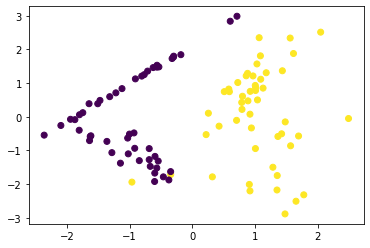

(array([[ 0.21963139, -0.5288487 ],
        [-0.56365615,  1.5315543 ],
        [ 1.3541387 , -1.7458986 ],
        [-0.68803006, -0.94416773],
        [-1.0316248 , -0.63220847],
        [-2.363547  , -0.54437685],
        [ 1.3501878 , -2.174258  ],
        [-0.6016953 , -1.9222633 ],
        [ 1.4816788 , -0.15132494],
        [ 0.6046065 ,  2.839939  ]], dtype=float32),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0.], dtype=float32))

In [122]:
'''数据集分类和可视化'''
from sklearn import svm
plt.scatter(feature[:,0],feature[: ,1],c=target)
plt.show()
feature = feature.astype(np.float32)
target = target.astype(np.float32)

xTrain,xTest ,yTrain,yTest = sklearn.model_selection.train_test_split(feature,target,test_size=0.1)

xTest,yTest

如果只会调用代码而不会明白原理是没有进步可言的!
我们试着一步步理解这个决策边界,现在来试着可视化这个过程
一个技巧是
    生成x和y坐标的一个精细网格，运行SVM的predict方法。这让我们知道分类器对每个（x, y）点的预测标签是什么.


步骤
1.我们不希望任何数据点落在边界上,重新设置x,y的区间
2.根据边界值创建一个精细的网格

opencv 中处理的数据和torch 一样都需要float32类型

In [123]:
'''使用opencv建立SVM支持向量机'''
import cv2
import numpy as np


X = feature.astype(np.float32)
y = target * 2 - 1

svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(xTrain,yTrain)
def plot_decision_boundary(svm, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)
plot_decision_boundary(svm,xTest,yTest)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 计算x,y坐标对应的高度值
def f(x, y):
 return (1-x/2+x**3+y**5) * np.exp(-x**2-y**2)

# 生成x,y的数据
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)

# 填充等高线
plt.contourf(X, Y, f(X, Y))
# 显示图表
plt.show()
f(X,Y).shape